In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/salary_dataset.csv")

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0, 0.5, 'salary')

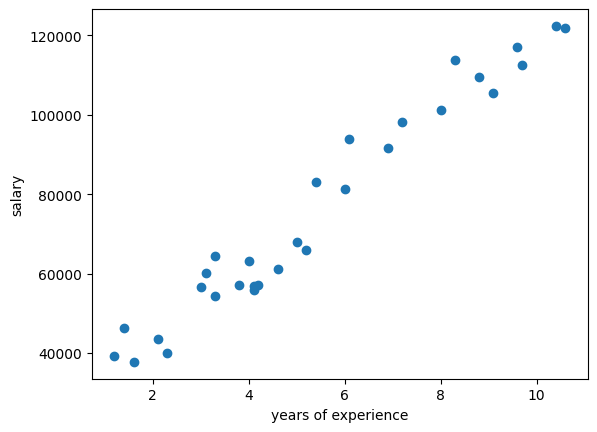

In [ ]:
## scatter plot
plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("years of experience")
plt.ylabel("salary")

In [ ]:
## Correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


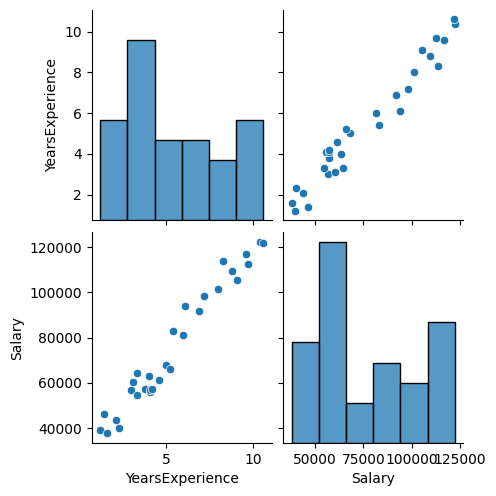

In [ ]:
## seaborn for visualization]
import seaborn as sns
sns.pairplot(df)

Independent feature : should be data frame or 2 dim array. shape of this should be (32, 1)

Dependent feature: this feature can be in series or 1D array.

In [ ]:
## Independent and dependant feature
X = df[["YearsExperience"]]
y = df["Salary"]

In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression

LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression.coef_  # this is value of beta1(weight or slop)

array([25063.1519945])

In [ ]:
print("Coefficient or Slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or Slope: [25063.1519945]
Intercept: 70417.40909090909


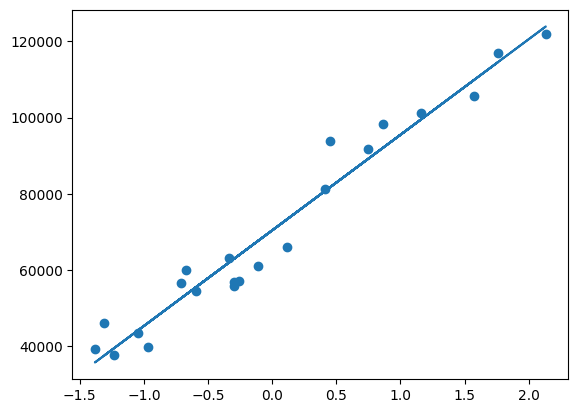

In [ ]:
## Plot the Training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

Prediction of test data
1. predicted_salary output = intercept + coefficient(weights)

2. y_pred_test = 70417.40 + 25063.15(X_test)

In [ ]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [ ]:
## performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

38802588.99247059
5056.9954666635895
6229.172416338352


## R square

formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination

SSR = sum of square of residuals

SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test, y_pred)
print(score)

0.9347210011126783


Adjusted R-Squared = 1- [(1 – R2) (n – 1)/ (n – k – 1)]

where,

n: number of data points

k: number of independent variables

R: R-squared value


In [ ]:
## Adjsted R-sqaured
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9238411679647913

In [ ]:
## OLS Linear Regression
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train, X_train).fit()

In [ ]:
prediction = model.predict(X_test)
print(prediction)

[ 45023.47271018    979.6971356   31904.0501986    4728.10356748
 -14951.03019988 -10265.52216003  51583.18396597  36589.55823845]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              2.645
Date:                Tue, 18 Jun 2024   Prob (F-statistic):                       0.119
Time:                        18:32:48   Log-Likelihood:                         -276.85
No. Observations:                  22   AIC:                                      555.7
Df Residuals:                      21   BIC:                                      556.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## Prediction for new data
regression.predict(scaler.transform([[2.1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44221.15959539])